In [35]:
## Data Cleaning
import pandas as pd

# 1. Load raw data
path = "C:/Users/huahua-zz/Desktop/group project/data_unclean.xlsx"
df = pd.read_excel(path)

# 2. Columns to DROP (21 variables unnecessary for RQ1 + RQ2)
drop_cols = [
    'num_bird','num_fish','num_ferret','num_gerbil','num_guinea','num_hamster',
    'num_horse','num_iguana','num_mice','num_rabbit','num_rat','num_snake',
    'num_tarantula','num_turtle','num_gecko','num_snail', 'living_status',
    'gender_aab', 'income', 'sexuality', 'ethnicity', 'employment', 'mh_dx_type',
    'gender_dummy', 'sexuality_dummy', 'ethnicity_dummy'
]
df = df.drop(columns=drop_cols)

# 3. Convert key variables to proper types
# 3.1 pet_owner: convert Yes/No to binary 1/0
df['pet_owner_bin'] = df['pet_owner'].map({'Yes': 1, 'No': 0})

# 3.2 Set categorical variables as category dtype
cat_cols = ['gender', 'mh_dx', 'sh_status', 'pet_owner']
for c in cat_cols:
    df[c] = df[c].astype('category')

# 3.3 Ensure numeric variables are numeric dtype
num_cols = [
    'age','num_pets','pet_diversity','num_cat','num_dog',
    'prs_affective','prs_family','prs_activity','prs_total',
    'hads_anxiety','hads_depression',
    'sh_severity','sh_diversity','sh_time_weeks',
    'sbq_total'
]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# 4. Inspect missing values (especially PRS)
print("Missing counts in numeric variables:")
print(df[num_cols].isna().sum())
print("\nMissing counts in PRS variables:")
print(df[['prs_affective','prs_family','prs_activity','prs_total']].isna().sum())

# 5. Save clean dataset for analysis
df.to_csv("C:/Users/huahua-zz/Desktop/group project/data_clean.csv", index=False)

Missing counts in numeric variables:
age                 0
num_pets            0
pet_diversity       0
num_cat             0
num_dog             0
prs_affective      56
prs_family         56
prs_activity       56
prs_total          56
hads_anxiety        0
hads_depression     0
sh_severity         0
sh_diversity        0
sh_time_weeks       0
sbq_total           0
dtype: int64

Missing counts in PRS variables:
prs_affective    56
prs_family       56
prs_activity     56
prs_total        56
dtype: int64


In [ ]:
#RQ1: Does pet ownership and the quality of the pet–owner bond influence mental health of youth?

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/huahua-zz/Desktop/group project/data_clean.csv")

## RQ1: Overall Descriptive Statistics
def descriptive_tables(df, num_vars):
    df = df.copy()
    for v in num_vars:
        df[v] = pd.to_numeric(df[v])
    print("\n# Overall Descriptive Statistics:")
    print(df[num_vars].describe().T)

num_vars = ['num_pets', 'pet_diversity', 'prs_total', 
            'hads_anxiety', 'hads_depression', 'sh_severity', 'sbq_total']
descriptive_tables(df, num_vars)


# Overall Descriptive Statistics:
                 count       mean       std   min    25%   50%    75%   max
num_pets         169.0   1.207101  1.164330  0.00   0.00   1.0   2.00   6.0
pet_diversity    169.0   1.005917  0.966689  0.00   0.00   1.0   2.00   6.0
prs_total        113.0   3.945752  0.709085  1.19   3.55   4.0   4.45   5.0
hads_anxiety     169.0  13.479290  2.417911  3.00  12.00  14.0  15.00  19.0
hads_depression  169.0  11.242604  3.016870  3.00   9.00  11.0  13.00  19.0
sh_severity      169.0   5.923077  5.111844  1.00   2.00   4.0   8.00  21.0
sbq_total        169.0  12.579882  4.512662  3.00   9.00  13.0  16.00  21.0


C:\Users\huahua-zz\AppData\Local\Temp\ipykernel_14276\2287184436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pet_owner', y=var, data=df, palette='Set2', showmeans=True)


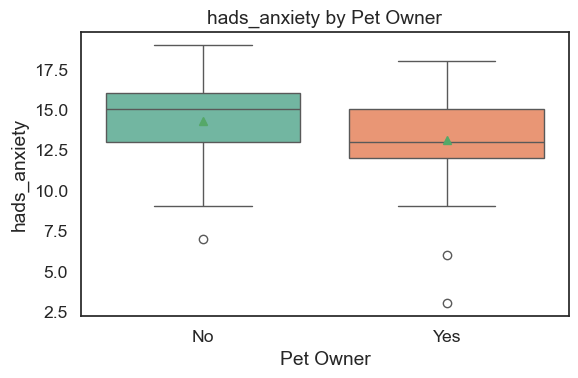

C:\Users\huahua-zz\AppData\Local\Temp\ipykernel_14276\2287184436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pet_owner', y=var, data=df, palette='Set2', showmeans=True)


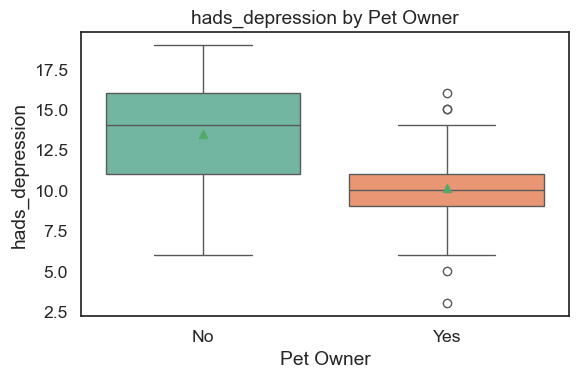

C:\Users\huahua-zz\AppData\Local\Temp\ipykernel_14276\2287184436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pet_owner', y=var, data=df, palette='Set2', showmeans=True)


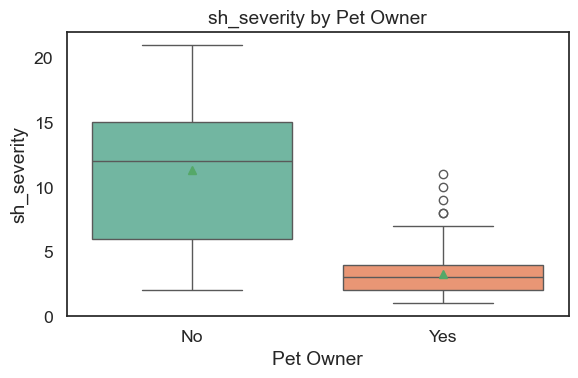

C:\Users\huahua-zz\AppData\Local\Temp\ipykernel_14276\2287184436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pet_owner', y=var, data=df, palette='Set2', showmeans=True)


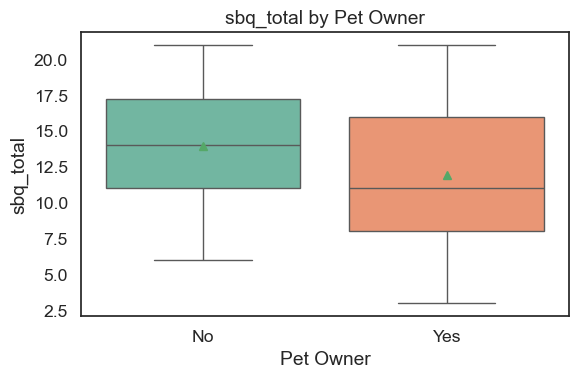

In [38]:
## RQ1: Grouped Descriptive Statistics
def plot_petowner_boxplot(df, mh_vars):
    for var in mh_vars:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='pet_owner', y=var, data=df, palette='Set2', showmeans=True)
        plt.title(f'{var} by Pet Owner')
        plt.xlabel('Pet Owner')
        plt.ylabel(var)
        plt.tight_layout()
        plt.show()

mh_vars = ['hads_anxiety', 'hads_depression', 'sh_severity', 'sbq_total']
plot_petowner_boxplot(df, mh_vars)

In [39]:
## RQ1: pet_owner statistical test
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene, norm

def test_pet_owner_effect(df, mh_var):
    # Map pet ownership
    df["pet_owner"] = df["pet_owner_bin"].map({1:"owner", 0:"non_owner"})
    owners = df[df.pet_owner=="owner"][mh_var].dropna()
    nonowners = df[df.pet_owner=="non_owner"][mh_var].dropna()

    # 1. Normality Test
    p1 = shapiro(owners).pvalue
    p2 = shapiro(nonowners).pvalue
    print(f"\n# Variable tested: {mh_var}")
    if p1 > 0.05 and p2 > 0.05:
        # 2. Homogeneity Test of Variance
        levene_p = levene(owners, nonowners).pvalue
        if levene_p > 0.05:
            print("Use standard t-test (equal variance)")
            test_result = ttest_ind(owners, nonowners, equal_var=True)
        else:
            print("Use Welch t-test (unequal variance)")
            test_result = ttest_ind(owners, nonowners, equal_var=False)
    else:
        print("Use Mann–Whitney U test")
        test_result = mannwhitneyu(owners, nonowners, alternative='two-sided')
    print("Test statistics:", test_result)

    # 3. Calculate the Mean
    print("owners mean:", owners.mean())
    print("non-owners mean:", nonowners.mean())

    # 4. Calculate the Median
    print("owners median:", owners.median())
    print("non-owners median:", nonowners.median())

    # 5. Calculate the Effect Size (r = z / sqrt(n))
    res = mannwhitneyu(owners, nonowners, alternative='two-sided')
    U = res.statistic
    p = res.pvalue
    Z = norm.ppf(p/2) * -1
    N = len(owners) + len(nonowners)
    r = abs(Z) / (N ** 0.5)
    print("effect size r =", r)

# Using function
for outcome in ["hads_anxiety", "hads_depression", "sh_severity", "sbq_total"]:
    test_pet_owner_effect(df, outcome)


# Variable tested: hads_anxiety
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(2157.0), pvalue=np.float64(0.0006847919331468322))
owners mean: 13.079646017699115
non-owners mean: 14.285714285714286
owners median: 13.0
non-owners median: 15.0
effect size r = 0.261199741918885

# Variable tested: hads_depression
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(1295.5), pvalue=np.float64(3.4390305524832203e-10))
owners mean: 10.141592920353983
non-owners mean: 13.464285714285714
owners median: 10.0
non-owners median: 14.0
effect size r = 0.48289008318918997

# Variable tested: sh_severity
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(406.0), pvalue=np.float64(1.0847072550979908e-20))
owners mean: 3.247787610619469
non-owners mean: 11.321428571428571
owners median: 3.0
non-owners median: 12.0
effect size r = 0.7174944887347087

# Variable tested: sbq_total
Use Mann–Whitney U test
Test stat

In [40]:
## RQ1: bond quality statistical test
def test_prstotal_group(df, outcome_col):
    # 1. Group by prs_total
    low_bond = df[df['prs_total'] <= 3][outcome_col].dropna()
    high_bond = df[df['prs_total'] > 3][outcome_col].dropna()

    # 2. Normality Test
    p1 = shapiro(low_bond).pvalue
    p2 = shapiro(high_bond).pvalue
    print(f"\n# Outcome variable: {outcome_col}")
    if p1 > 0.05 and p2 > 0.05:
        # 3. Homogeneity Test of Variance
        levene_p = levene(low_bond, high_bond).pvalue
        if levene_p > 0.05:
            print("Use standard t-test (equal variance)")
            test_result = ttest_ind(low_bond, high_bond, equal_var=True)
        else:
            print("Use Welch t-test (unequal variance)")
            test_result = ttest_ind(low_bond, high_bond, equal_var=False)
    else:
        print("Use Mann–Whitney U test")
        test_result = mannwhitneyu(low_bond, high_bond, alternative='two-sided')
    print("Test statistics:", test_result)

    # 4. Calculate the Mean
    print("low bond mean:", low_bond.mean())
    print("high bond mean:", high_bond.mean())

    # 5. Calculate the Effect Size (r = z / sqrt(n))
    res = mannwhitneyu(low_bond, high_bond, alternative='two-sided')
    U = res.statistic
    p = res.pvalue
    Z = norm.ppf(p/2) * -1
    N = len(low_bond) + len(high_bond)
    r = abs(Z) / (N ** 0.5)
    print("effect size r =", r)

    # 6. Calculate the Median
    print("low bond median:", low_bond.median())
    print("high bond median:", high_bond.median())

# Using function:
for outcome in ["hads_anxiety", "hads_depression", "sh_severity", "sbq_total"]:
    test_prstotal_group(df, outcome)


# Outcome variable: hads_anxiety
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(345.5), pvalue=np.float64(0.7633545746219401))
low bond mean: 12.857142857142858
high bond mean: 13.09433962264151
effect size r = 0.028323090287127786
low bond median: 13.0
high bond median: 13.0

# Outcome variable: hads_depression
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(219.5), pvalue=np.float64(0.06893947120299909))
low bond mean: 8.857142857142858
high bond mean: 10.226415094339623
effect size r = 0.1710998384715946
low bond median: 8.0
high bond median: 10.0

# Outcome variable: sh_severity
Use Mann–Whitney U test
Test statistics: MannwhitneyuResult(statistic=np.float64(650.0), pvalue=np.float64(0.0005746363123507507))
low bond mean: 7.285714285714286
high bond mean: 2.981132075471698
effect size r = 0.32391952996649015
low bond median: 7.0
high bond median: 3.0

# Outcome variable: sbq_total
Use Mann–Whitney U test
Test stati

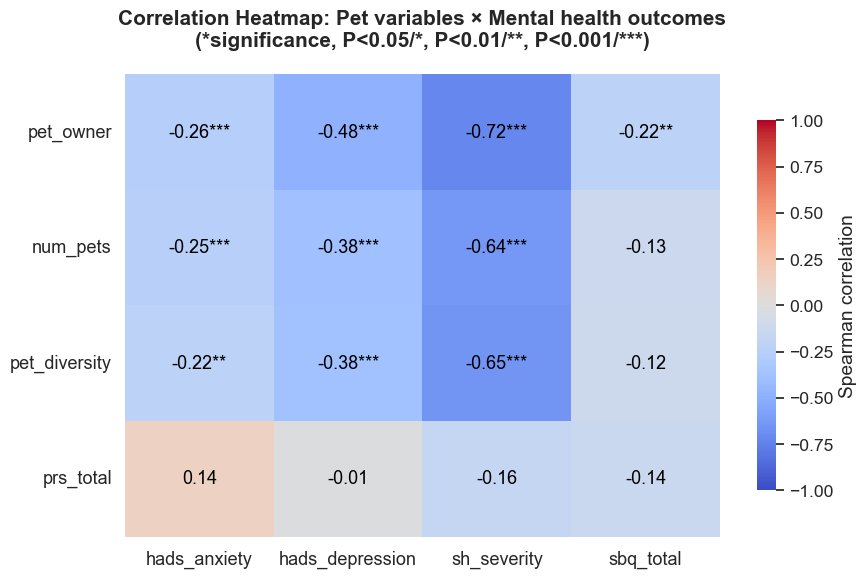

In [41]:
## RQ1: Heatmap：Pet variables × Mental Health outcomes
import numpy as np
from scipy.stats import spearmanr

data = pd.read_csv('C:/Users/huahua-zz/Desktop/group project/data_clean.csv')

# 1. Variable Selection and Preprocessing
pet_vars = ['pet_owner', 'num_pets', 'pet_diversity', 'prs_total']
mh_vars = ['hads_anxiety', 'hads_depression', 'sh_severity', 'sbq_total']
df = data[pet_vars + mh_vars].copy()
df['pet_owner'] = df['pet_owner'].map({'Yes': 1, 'No': 0}).astype(float)

# 2. Correlation and Significance CaLculation (handling missing values for each pair of variables)
corr_matrix = np.zeros((len(pet_vars), len(mh_vars)))
p_matrix = np.zeros((len(pet_vars), len(mh_vars)))
for i, pet in enumerate(pet_vars):
    for j, mh in enumerate(mh_vars):
        sub_df = df[[pet, mh]].dropna() 
        if sub_df[pet].nunique() < 2 or sub_df[mh].nunique() < 2:
            coef, pval = np.nan, np.nan
        else:
            coef, pval = spearmanr(sub_df[pet], sub_df[mh])
        corr_matrix[i, j] = coef
        p_matrix[i, j] = pval

# 3. Mark the Correlation Coefficient and Significance
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

labels = np.array([f"{corr_matrix[i,j]:.2f}{significance_stars(p_matrix[i,j])}"
                   for i in range(len(pet_vars)) for j in range(len(mh_vars))])
labels = labels.reshape(corr_matrix.shape)

# 4. Visualization
plt.figure(figsize=(9,6))
sns.set(font_scale=1.15, style='white')
cmap = 'coolwarm'
ax = sns.heatmap(
    corr_matrix, 
    annot=labels, 
    fmt='', 
    cmap=cmap,
    vmin=-1, vmax=1, 
    xticklabels=mh_vars, 
    yticklabels=pet_vars,
    cbar_kws={"label": "Spearman correlation", "shrink": 0.8},
    annot_kws={"size": 13, "weight": "normal", "color": "black"}, 
    linewidths=0 
)
plt.xticks(fontsize=13, weight='normal', rotation=0)
plt.yticks(fontsize=13, weight='normal', rotation=0)
plt.title("Correlation Heatmap: Pet variables × Mental health outcomes\n(*significance, P<0.05/*, P<0.01/**, P<0.001/***)", 
          fontsize=15, weight="bold", pad=20)
plt.tight_layout()
plt.show()

In [ ]:
#RQ2: What are the mechanisms by which the quality of the pet ownership affects the mental health of youth? 

In [73]:
## RQ2: Data preparation for hierarchical SEM model
# 1. Import required libraries and load the dataset

# We import pandas and numpy for data handling and basic cleaning
import pandas as pd
import numpy as np

csv_path = 'C:/Users/huahua-zz/Desktop/group project/data_clean.csv'
df_raw = pd.read_csv(csv_path)

# Quickly inspect the basic structure to "understand" the dataset
print("\nData shape (rows, columns):", df_raw.shape)
print("\nColumn names:\n", df_raw.columns.tolist())
print("\nData types summary:")
print(df_raw.dtypes)

# Display the first few rows for a quick sanity check
df_raw.head()


Data shape (rows, columns): (169, 24)

Column names:
 ['age', 'gender', 'mh_dx', 'sh_status', 'pet_owner', 'num_pets', 'pet_diversity', 'num_cat', 'num_dog', 'prs_affective', 'prs_family', 'prs_activity', 'prs_total', 'hads_anxiety', 'hads_depression', 'sh_severity', 'sh_diversity', 'sh_time_weeks', 'sbq1_lietime', 'sbq2_pastyear', 'sbq3_disclosure', 'sbq4_future', 'sbq_total', 'pet_owner_bin']

Data types summary:
age                  int64
gender              object
mh_dx               object
sh_status           object
pet_owner           object
num_pets             int64
pet_diversity        int64
num_cat              int64
num_dog              int64
prs_affective      float64
prs_family         float64
prs_activity       float64
prs_total          float64
hads_anxiety         int64
hads_depression      int64
sh_severity          int64
sh_diversity         int64
sh_time_weeks      float64
sbq1_lietime         int64
sbq2_pastyear        int64
sbq3_disclosure      int64
sbq4_future  

,age,gender,mh_dx,sh_status,pet_owner,num_pets,pet_diversity,num_cat,num_dog,prs_affective,...,hads_depression,sh_severity,sh_diversity,sh_time_weeks,sbq1_lietime,sbq2_pastyear,sbq3_disclosure,sbq4_future,sbq_total,pet_owner_bin
0,21,Male,Yes,"Yes, currently",No,0,0,0,0,NaN,...,18,20,11,1.0,5,5,5,4,19,0
1,20,Male,Yes,"Yes, currently",Yes,2,2,1,1,3.88,...,9,2,1,4.0,2,2,2,1,7,1
2,19,Female,Yes,"Yes, but not currently",Yes,3,3,0,1,3.13,...,12,2,1,12.0,2,2,2,2,8,1
3,18,Female,Yes,"Yes, currently",Yes,2,1,0,1,4.13,...,8,2,1,8.0,2,2,2,2,8,1
4,23,Female,Yes,"Yes, but not currently",Yes,3,1,1,0,4.00,...,8,1,1,52.0,4,1,3,4,12,1


In [79]:
# 2.Select variables required for RQ2 hierarchical SEM
rq2_vars = [
    # Pet ownership / structure
    'pet_owner_bin',        # whether currently owns a pet (yes/no or 0/1)
    'num_pets',         # number of pets
    'pet_diversity',    # diversity of pet types

    # Pet–owner bond quality (PRS subscales and total score)
    'prs_affective',
    'prs_family',
    'prs_activity',

    # Self-harm / suicide related indicators
    'sbq_total',        # suicide risk (SBQ-R total score)
    'sh_severity',      # self-harm method severity index
    'sh_diversity',     # self-harm method diversity
    'sh_time_weeks',    # time since last self-harm (weeks)

    # Mood symptom indicators
    'hads_anxiety',
    'hads_depression',
]

# Create a working DataFrame containing only RQ2-related variables
df_rq2 = df_raw[rq2_vars].copy()

print("RQ2 data shape:", df_rq2.shape)
df_rq2.head()

RQ2 data shape: (169, 12)


,pet_owner_bin,num_pets,pet_diversity,prs_affective,prs_family,prs_activity,sbq_total,sh_severity,sh_diversity,sh_time_weeks,hads_anxiety,hads_depression
0,0,0,0,NaN,NaN,NaN,19,20,11,1.0,17,18
1,1,2,2,3.88,3.50,3.43,7,2,1,4.0,13,9
2,1,3,3,3.13,3.33,3.43,8,2,1,12.0,11,12
3,1,2,1,4.13,5.00,4.14,8,2,1,8.0,10,8
4,1,3,1,4.00,3.50,3.43,12,1,1,52.0,13,8


In [80]:
# 3. Basic cleaning for RQ2 variables

# Here we perform light cleaning steps that are generally safe before SEM:
# - Inspect missingness across RQ2 variables.
# - Handle specific missing value rules (e.g., PRS subscales set missing to 0).
# - Optionally, drop rows that are completely missing on key MH indicators.

# Check missing value counts for RQ2 variables
missing_counts = df_rq2.isna().sum().sort_values(ascending=False)
print("Missing values per variable (before cleaning):\n", missing_counts)

# Fill missing values in PRS subscales with 0, as specified
# Rationale: 0 is interpreted as 'no affective/family/activity bond' when data are missing.
prs_cols = ['prs_affective', 'prs_family', 'prs_activity']

for col in prs_cols:
    if col in df_rq2.columns:
        df_rq2[col] = df_rq2[col].fillna(0)
    else:
        print(f"Warning: column '{col}' not found in df_rq2; please check the dataset.")

# Verify that PRS subscales no longer contain missing values
print("\nMissing values in PRS subscales after imputation:")
print(df_rq2[prs_cols].isna().sum())

# Save a cleaned copy for downstream SEM modeling 
df_rq2.to_csv('C:/Users/huahua-zz/Desktop/group project/pet_rq2_cleann.csv', index=False)

Missing values per variable (before cleaning):
 prs_affective      56
prs_family         56
prs_activity       56
pet_owner_bin       0
pet_diversity       0
num_pets            0
sbq_total           0
sh_severity         0
sh_diversity        0
sh_time_weeks       0
hads_anxiety        0
hads_depression     0
dtype: int64

Missing values in PRS subscales after imputation:
prs_affective    0
prs_family       0
prs_activity     0
dtype: int64


In [82]:
# 4. Prepare data matrix for hierarchical SEM (RQ2)

# Here we construct a clean DataFrame containing only the observed variables
# that enter the SEM and drop any remaining rows with missing values on
# these key indicators (listwise deletion for the SEM sample).

sem_vars = [
    # Pet ownership / structure
    'pet_owner_bin', 'num_pets', 'pet_diversity',

    # Pet–owner bond quality (PRS subscales)
    'prs_affective', 'prs_family', 'prs_activity',

    # Suicide / self-harm indicators (for MH_suicide)
    'sbq_total', 'sh_severity', 'sh_diversity', 'sh_time_weeks',

    # Mood symptom indicators (for MH_mood)
    'hads_anxiety', 'hads_depression'
]

# Start from the already cleaned RQ2 dataset
df_sem = df_rq2[sem_vars].copy()

# Drop any rows with missing values on SEM indicators
# (after our previous cleaning, there should be very few or none)
df_sem_before = df_sem.shape[0]
df_sem = df_sem.dropna(subset=sem_vars)
df_sem_after = df_sem.shape[0]

print(f"SEM sample size before listwise deletion: {df_sem_before}")
print(f"SEM sample size after listwise deletion:  {df_sem_after}")

SEM sample size before listwise deletion: 169
SEM sample size after listwise deletion:  169


In [83]:
# 5. Specify the hierarchical SEM model for RQ2

# We use semopy's lavaan-style syntax to define a hierarchical mechanism-focused SEM.
# The model includes:
#   (1) Measurement layer
#       - MH_suicide as a latent factor measured by suicide/self-harm indicators.
#       - MH_mood    as a latent factor measured by HADS anxiety/depression.
#       - MH_overall as a second-order factor measured by MH_suicide and MH_mood.
#   (2) Structural layer (mechanistic paths)
#       - Ownership/structure → Bond quality: pet_owner, num_pets, pet_diversity
#         predicting each PRS subscale.
#       - Bond quality → Mental health: PRS subscales predicting MH_mood and MH_suicide.
#       - Cross-dimension path: MH_mood → MH_suicide to test whether mood
#         mediates part of the association between bond quality and suicide risk.

sem_model_desc = """
# Measurement layer
MH_suicide =~ sbq_total + sh_severity + sh_diversity + sh_time_weeks
MH_mood    =~ hads_anxiety + hads_depression

# Second-order factor (overall mental health)
MH_overall =~ MH_suicide + MH_mood

# Structural layer: pet ownership/structure → pet–owner bond quality
prs_affective ~ pet_owner_bin + num_pets + pet_diversity
prs_family    ~ pet_owner_bin + num_pets + pet_diversity
prs_activity  ~ pet_owner_bin + num_pets + pet_diversity

# Structural layer: pet–owner bond quality → mental health dimensions
MH_mood       ~ prs_affective + prs_family + prs_activity
MH_suicide    ~ prs_affective + prs_family + prs_activity + MH_mood
"""

# Print the model string so it is easy to inspect or copy into papers/appendix.
print(sem_model_desc)


# Measurement layer
MH_suicide =~ sbq_total + sh_severity + sh_diversity + sh_time_weeks
MH_mood    =~ hads_anxiety + hads_depression

# Second-order factor (overall mental health)
MH_overall =~ MH_suicide + MH_mood

# Structural layer: pet ownership/structure → pet–owner bond quality
prs_affective ~ pet_owner_bin + num_pets + pet_diversity
prs_family    ~ pet_owner_bin + num_pets + pet_diversity
prs_activity  ~ pet_owner_bin + num_pets + pet_diversity

# Structural layer: pet–owner bond quality → mental health dimensions
MH_mood       ~ prs_affective + prs_family + prs_activity
MH_suicide    ~ prs_affective + prs_family + prs_activity + MH_mood



In [84]:
# 6. Fit the hierarchical SEM model using semopy
!pip install semopy
try:
    from semopy import Model, Optimizer, calc_stats
except ImportError as e:
    raise ImportError(
        "semopy is required to run the SEM. "
        "Install it with 'pip install semopy' and then re-run this cell."
    ) from e

# Initialize the SEM model object with the specified model description
model = Model(sem_model_desc)

# Fit the model to the prepared SEM dataset (df_sem)
# semopy uses maximum likelihood by default. For small samples, convergence
results = model.fit(df_sem)

print("Model fitting results (optimizer report):")
print(results)

Model fitting results (optimizer report):
Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 2.214
Number of iterations: 161
Params: 4.218 2.327 -3.110 3.238 -0.462 3.953 -0.059 0.063 3.976 -0.002 0.006 3.863 -0.215 0.230 -0.579 -0.041 0.390 0.236 -0.162 -0.408 0.611 0.408 0.174 0.347 5.098 1.619 0.627 0.343 0.366 18.766 0.159 0.499 222.000


In [85]:
# Extract parameter estimates (loadings, regressions, variances)
param_estimates = model.inspect()
print("\nFirst few parameter estimates:")
display(param_estimates.head(20))

# Compute and display common global fit indices
stats = calc_stats(model)

# Depending on the semopy version, stats may store fit indices as columns
# (with a simple integer index). To avoid KeyError when selecting by row
# labels, we select them as COLUMNS and then optionally transpose.
fit_names = ['n', 'DoF', 'Chi2', 'p-value', 'CFI', 'TLI', 'RMSEA', 'SRMR']

print("\nFull stats table returned by calc_stats (baseline model):")
print(stats)

# Extract a single row of indices
row_baseline = stats.loc['Value']

# Build a compact Series/DataFrame with commonly reported indices.
fit_indices = pd.DataFrame({
    'DoF': [row_baseline.get('DoF')],
    'Chi2': [row_baseline.get('chi2')],
    'p-value': [row_baseline.get('chi2 p-value')],
    'CFI': [row_baseline.get('CFI')],
    'TLI': [row_baseline.get('TLI')],
    'RMSEA': [row_baseline.get('RMSEA')],
    # SRMR is not provided in this semopy stats output; leave as NaN
    'SRMR': [row_baseline.get('SRMR')],
    # Add sample size from the data directly
    'n': [df_sem.shape[0]]
}).T

print("\nSelected global fit indices for the hierarchical SEM:")
print(fit_indices)

# Save parameter estimates to a CSV file for reporting
param_estimates.to_csv('C:/Users/huahua-zz/Desktop/group project/rq2_sem_parameterss.csv', index=False)


First few parameter estimates:


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,MH_suicide,~,MH_overall,1.000000,-,-,-
1,MH_mood,~,MH_overall,-0.462326,0.109017,-4.24086,0.000022
2,prs_affective,~,pet_owner_bin,3.952798,0.144715,27.314392,0.0
3,prs_affective,~,num_pets,-0.059467,0.098006,-0.606764,0.544007
4,prs_affective,~,pet_diversity,0.062786,0.118553,0.529601,0.596388
5,prs_family,~,pet_owner_bin,3.976495,0.14944,26.609326,0.0
6,prs_family,~,num_pets,-0.001728,0.101206,-0.017071,0.98638
7,prs_family,~,pet_diversity,0.005957,0.122424,0.048656,0.961194
8,prs_activity,~,pet_owner_bin,3.862663,0.195597,19.748075,0.0
9,prs_activity,~,num_pets,-0.215483,0.132465,-1.62671,0.103799



Full stats table returned by calc_stats (baseline model):
       DoF  DoF Baseline        chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   45            69  374.088528           0.0    2746.837814  0.877107   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.863811  0.791177  0.863811  0.811563  0.208639  61.572917   

              BIC    LogLik  
Value  164.859574  2.213542  

Selected global fit indices for the hierarchical SEM:
                  0
DoF            45.0
Chi2     374.088528
p-value         0.0
CFI        0.877107
TLI        0.811563
RMSEA      0.208639
SRMR           None
n               169


In [86]:
# 7. Summarize baseline SEM results

# At this stage we focus on the core RQ2 hierarchical SEM without
# any demographic covariates. This cell simply provides a clean
# summary of the baseline model fitted in Step 6.

print("Baseline hierarchical SEM (no demographic controls)")
print("\nSelected global fit indices:")
print(fit_indices)

print("\nHead of parameter estimates (loadings & paths):")
display(param_estimates.head(30))

Baseline hierarchical SEM (no demographic controls)

Selected global fit indices:
                  0
DoF            45.0
Chi2     374.088528
p-value         0.0
CFI        0.877107
TLI        0.811563
RMSEA      0.208639
SRMR           None
n               169

Head of parameter estimates (loadings & paths):


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,MH_suicide,~,MH_overall,1.000000,-,-,-
1,MH_mood,~,MH_overall,-0.462326,0.109017,-4.24086,0.000022
2,prs_affective,~,pet_owner_bin,3.952798,0.144715,27.314392,0.0
3,prs_affective,~,num_pets,-0.059467,0.098006,-0.606764,0.544007
4,prs_affective,~,pet_diversity,0.062786,0.118553,0.529601,0.596388
5,prs_family,~,pet_owner_bin,3.976495,0.14944,26.609326,0.0
6,prs_family,~,num_pets,-0.001728,0.101206,-0.017071,0.98638
7,prs_family,~,pet_diversity,0.005957,0.122424,0.048656,0.961194
8,prs_activity,~,pet_owner_bin,3.862663,0.195597,19.748075,0.0
9,prs_activity,~,num_pets,-0.215483,0.132465,-1.62671,0.103799


In [87]:
# 8. Visualize the hierarchical SEM (path diagram) 

# We construct a simple conceptual path diagram using networkx + matplotlib

import networkx as nx
import matplotlib.pyplot as plt

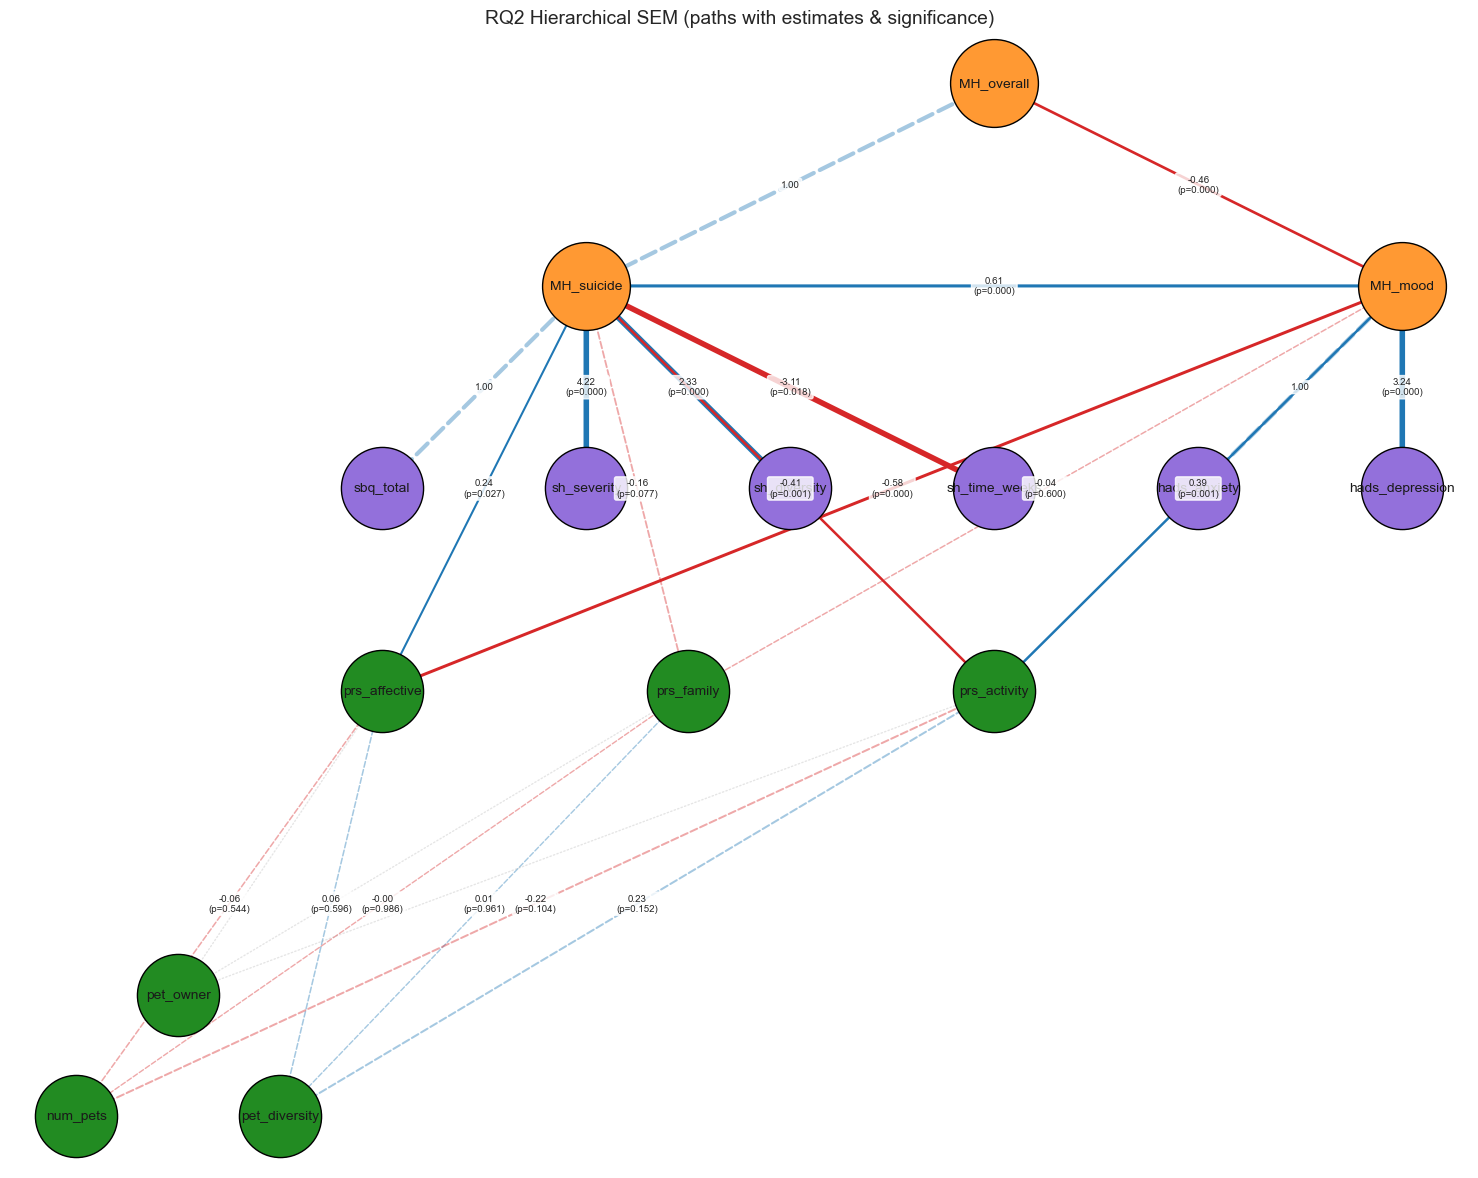

In [88]:
# Define latent and observed variables in the model
latent_nodes = ['MH_overall', 'MH_suicide', 'MH_mood']
observed_nodes = [
    # Pet ownership / structure
    'pet_owner', 'num_pets', 'pet_diversity',
    # Pet–owner bond quality (PRS subscales)
    'prs_affective', 'prs_family', 'prs_activity',
    # Suicide / self-harm indicators
    'sbq_total', 'sh_severity', 'sh_diversity', 'sh_time_weeks',
    # Mood symptom indicators
    'hads_anxiety', 'hads_depression'
]

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(latent_nodes, layer='latent')
G.add_nodes_from(observed_nodes, layer='observed')

# Add measurement paths (latent → observed)
measurement_edges = [
    ('MH_suicide', 'sbq_total'),
    ('MH_suicide', 'sh_severity'),
    ('MH_suicide', 'sh_diversity'),
    ('MH_suicide', 'sh_time_weeks'),
    ('MH_mood', 'hads_anxiety'),
    ('MH_mood', 'hads_depression')
]

# Second-order factor paths
second_order_edges = [
    ('MH_overall', 'MH_suicide'),
    ('MH_overall', 'MH_mood')
]

# Structural paths: pet ownership/structure → PRS
struct_pet_to_prs = [
    ('pet_owner', 'prs_affective'),
    ('num_pets', 'prs_affective'),
    ('pet_diversity', 'prs_affective'),
    ('pet_owner', 'prs_family'),
    ('num_pets', 'prs_family'),
    ('pet_diversity', 'prs_family'),
    ('pet_owner', 'prs_activity'),
    ('num_pets', 'prs_activity'),
    ('pet_diversity', 'prs_activity')
]

# Structural paths: PRS → MH_mood and MH_suicide (plus MH_mood → MH_suicide)
struct_prs_to_mh = [
    ('prs_affective', 'MH_mood'),
    ('prs_family', 'MH_mood'),
    ('prs_activity', 'MH_mood'),
    ('prs_affective', 'MH_suicide'),
    ('prs_family', 'MH_suicide'),
    ('prs_activity', 'MH_suicide'),
    ('MH_mood', 'MH_suicide')
]

all_edges = measurement_edges + second_order_edges + struct_pet_to_prs + struct_prs_to_mh
G.add_edges_from(all_edges)

# Manually specify node positions to emphasize layered structure
# Bottom: pet ownership / structure
# Mid-left: PRS bond quality
# Mid-right: MH latent factors
# Bottom-right: MH observed indicators
# Top: overall mental health
pos = {
    # Top level (second-order factor) - highest position
    'MH_overall': (0, 4.5),

    # Middle-upper level (first-order latent factors)
    'MH_suicide': (-2.0, 3.5),
    'MH_mood': (2.0, 3.5),

    # Pet ownership / structure (bottom layer)
    'pet_owner': (-4, 0.0),
    'num_pets': (-4.5, -0.6),
    'pet_diversity': (-3.5, -0.6),

    # Lower-middle layer: PRS subscales
    'prs_affective': (-3.0, 1.5),
    'prs_family': (-1.5, 1.5),
    'prs_activity': (0.0, 1.5),

    # Upper-middle layer: Mental health observed indicators
    # Suicide / self-harm indicators
    'sbq_total': (-3.0, 2.5),
    'sh_severity': (-2.0, 2.5),
    'sh_diversity': (-1.0, 2.5),
    'sh_time_weeks': (0.0, 2.5),

    # Mood indicators
    'hads_anxiety': (1.0, 2.5),
    'hads_depression': (2.0, 2.5)
}

# Define groups for styling
pet_nodes = ['pet_owner', 'num_pets', 'pet_diversity']
prs_nodes = ['prs_affective', 'prs_family', 'prs_activity']
sh_nodes = ['sbq_total', 'sh_severity', 'sh_diversity', 'sh_time_weeks']
mood_obs_nodes = ['hads_anxiety', 'hads_depression']

fig, ax = plt.subplots(figsize=(15, 12))

# Draw latent variables (orange circles, larger)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=latent_nodes,
    node_color='#FF9933', node_size=4000,
    edgecolors='black', node_shape='o', ax=ax
)

# Draw pet structure variables (green circles)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=pet_nodes,
    node_color='#228B22', node_size=3500,
    edgecolors='black', node_shape='o', ax=ax
)

# Draw PRS bond-quality variables (blue circles)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=prs_nodes,
    node_color='#228B22', node_size=3500,
    edgecolors='black', node_shape='o', ax=ax
)

# Draw self-harm/suicide indicators (purple circles)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=sh_nodes,
    node_color='#9370DB', node_size=3500,
    edgecolors='black', node_shape='o', ax=ax
)

# Draw mood indicators (pink circles)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=mood_obs_nodes,
    node_color='#9370DB', node_size=3500,
    edgecolors='black', node_shape='o', ax=ax
)

# Draw labels on top of all nodes
nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

# Build a lookup table of estimates & p-values from param_estimates
cols = param_estimates.columns
col_lval = 'lval'
col_rval = 'rval'
col_op   = 'op'
col_est  = 'Estimate' if 'Estimate' in cols else 'est'
col_p    = 'p-value' if 'p-value' in cols else 'pval'

edge_info = {}
for _, row in param_estimates.iterrows():
    op = row[col_op]
    if op == '~':
        source = row[col_rval]
        target = row[col_lval]
    elif op == '=~':
        source = row[col_lval]
        target = row[col_rval]
    else:
        continue

    if (source, target) in edge_info:
        continue
    # Convert p-value to float if possible (some semopy versions store it as string)
    raw_p = row[col_p]
    try:
        p_val = float(raw_p)
    except (TypeError, ValueError):
        p_val = None

    edge_info[(source, target)] = {
        'est': row[col_est],
        'p': p_val
    }

# Draw each edge with style reflecting estimate, sign and significance
for source, target in all_edges:
    if source not in pos or target not in pos:
        continue

    x1, y1 = pos[source]
    x2, y2 = pos[target]

    info = edge_info.get((source, target))
    if info is not None:
        est = info['est']
        pval = info['p']
        lw = 1.0 + 2.0 * min(abs(est), 1.5)
        color = 'tab:red' if est < 0 else 'tab:blue'
        sig = (pval is not None) and (pval < 0.05)
        alpha = 1.0 if sig else 0.4
        linestyle = '-' if sig else '--'
    else:
        # No estimate available in param_estimates: draw a light grey edge
        est = None
        pval = None
        lw = 1.0
        color = 'grey'
        alpha = 0.2
        linestyle = ':'

    # Draw arrow
    ax.annotate(
        '',
        xy=(x2, y2), xycoords='data',
        xytext=(x1, y1), textcoords='data',
        arrowprops=dict(arrowstyle='-|>', lw=lw, color=color,
                        alpha=alpha, linestyle=linestyle),
        zorder=1
    )

    # Add label with estimate and p-value at midpoint
    xm, ym = (x1 + x2) / 2.0, (y1 + y2) / 2.0
    if est is not None:
        label = f"{est:.2f}"
        if pval is not None:
            label += f"\n(p={pval:.3f})"
        ax.text(xm, ym, label, fontsize=7, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

ax.set_title('RQ2 Hierarchical SEM (paths with estimates & significance)')
ax.axis('off')
plt.tight_layout()
plt.show()